In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
import SupervisedLearning.Experiments.RunExperiments as re
from SupervisedLearning.Experiments.RunExperiments import g_labels

import SupervisedLearning.Experiments.GetData as gd
import SupervisedLearning.Experiments.visualizeData as vd
import SupervisedLearning.NeuralNetworks.LinearClassifier as lc
import SupervisedLearning.NeuralNetworks.MultiLayerPerceptron as mlp
import SupervisedLearning.TreeLearning.RandomForest as rf
%load_ext autoreload
%autoreload 2

In [3]:
X_train, y_train = gd.get_data()

In [7]:
X_test, y_test = gd.get_data(train=False)

In [3]:
#perceptron = mlp.MultiLayerPerceptron(random_state=0, max_iter=520, hidden_layer_sizes=337, solver='lbfgs', activation='relu', learning_rate='adaptive', alpha=0.0005508)
#random_forest = rf.RandomForest(max_features='sqrt', n_estimators=400, criterion='entropy', min_weight_fraction_leaf=0.5)
logistic_regression = lc.LinearClassifier(solver='saga', max_iter=342, n_jobs=-1)

In [3]:
train_score, test_score = re.run_all_KF_experiments(logistic_regression, 'LR', experiment_name='LR all Kfolds')

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: samfh (use `wandb login --relogin` to force relogin)


In [10]:
train_score, test_score = re.run_KFold_experiment(logistic_regression, X_train, y_train, classifier_name='LR', classes_desc='all-classes', stratified=True)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: samfh (use `wandb login --relogin` to force relogin)


wandb: 
wandb: Plotting LR.
wandb: Logged feature importances.


In [9]:
perceptron.build_classifier(X_train, y_train)
y_pred = perceptron.prediction(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [10]:
accuracy

0.586084142394822

In [13]:
X, y = gd.get_data()
X, y = gd.balance_by_class(X, y, random_state=0)

X = X.to_numpy()
y = y.to_numpy(dtype='int64')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.33)

In [18]:
X_train

array([[ 29.,  25.,  25., ...,  29.,  27.,  25.],
       [ 38.,  34.,  33., ...,  37.,  44.,  62.],
       [ 49.,  46.,  50., ...,  23.,  32.,  32.],
       ...,
       [ 21.,  18.,  14., ...,  15.,  15.,  16.],
       [ 62.,  58.,  57., ...,  28.,  28.,  31.],
       [173., 164., 171., ...,  70.,  64.,  57.]])

In [20]:
perceptron.build_classifier(X_train, y_train)
y_pred = perceptron.prediction(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [21]:
accuracy

0.09379509379509379

# With training and testing data


In [4]:
perceptron = mlp.MultiLayerPerceptron(random_state=0, max_iter=300, hidden_layer_sizes=150, solver='lbfgs')

In [5]:
train, test = re.run_all_test_set_experiments(perceptron, 'MLP', experiment_name='MLP all test set experiments')

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: samfh (use `wandb login --relogin` to force relogin)


wandb: 
wandb: Plotting MLP.
wandb: WARNING feature_importances_ or coef_ attribute not in classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged learning curve.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision recall curve.


_step,6
_runtime,396
_timestamp,1606820898


_step,▁▂▃▅▆▇█
_runtime,▁▁▄▄███
_timestamp,▁▁▄▄███


In [ ]:
[train, test]

In [14]:
g_labels[1:]

['speed limit 20',
 'speed limit 30',
 'speed limit 50',
 'speed limit 60',
 'speed limit 70',
 'left turn',
 'right turn',
 'beware pedestrian crossing',
 'beware children',
 'beware cycle route ahead']

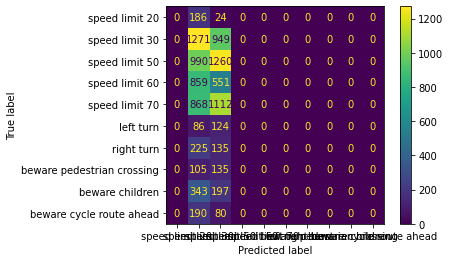

In [17]:
train_matrix = ConfusionMatrixDisplay(train, display_labels=g_labels[1:])
train_matrix.plot()

In [7]:
X_train_4000, y_train_4000, X_test_4000, y_test_4000 = re.new_test_set((X_train, y_train), (X_test, y_test))

In [ ]:
X_train_9000, y_train_9000, X_test_9000, y_test_9000 = re.new_test_set((X_train, y_train), (X_test, y_test))